<a href="https://colab.research.google.com/github/Nusnan-AM/JARTEST_models/blob/main/CatBoost_jar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.3 MB/s eta 0:00:00


# Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Load the Data

In [9]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': File exists
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
'augment_data1 (1).csv'
 augment_data1.csv
 catboost_info
'Colab Notebooks'
 colour_random_jar_model.pkl
'Contact '
'Contact Information.gform'
'Copy of augment_data1.csv'
'Copy of randomforest (1).ipynb'
'Copy of randomforest.ipynb'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
 data.csv
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_0115.JPG
 DSC_0116_1.JPG
 DSC_0117.JPG
 DS

In [10]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [11]:
data = pd.read_csv("jartest.csv")

In [12]:
X_turbidity = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_ph = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
X_colour = data[['Raw_Turbidity', 'Raw_Colour', 'Raw_PH', 'PAC', 'KMnO4','ACD']]
y_turbidity = data['Turbidity']
y_ph = data['PH']
y_colour = data['Colour']

# Model development

## Turbidiy


In [13]:
X_turbidity_train,X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(X_turbidity, y_turbidity, test_size=0.2, random_state=42)

In [14]:
model_turbidity = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=10,
    subsample=0.6,
    l2_leaf_reg=3,
    loss_function='MAE',  # Optimizing for MAE
    eval_metric='MAE',
    verbose=100  # Show progress
)

In [15]:
model_turbidity.fit(X_turbidity_train, y_turbidity_train)

0:	learn: 10.9340010	total: 75.9ms	remaining: 22.7s
100:	learn: 5.0685200	total: 2.3s	remaining: 4.54s
200:	learn: 4.1128982	total: 5s	remaining: 2.46s
299:	learn: 3.5671928	total: 8.53s	remaining: 0us


## PH

In [16]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)

In [17]:
model_ph =  CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=10,
    subsample=0.6,
    l2_leaf_reg=1,
    loss_function='MAE',  # Can change to 'RMSE' for MSE optimization
    eval_metric='MAE',
    verbose=100  # Show training progress
)

In [18]:
model_ph.fit(X_ph_train, y_ph_train)

0:	learn: 0.2888889	total: 22.9ms	remaining: 6.85s
100:	learn: 0.0694380	total: 2.13s	remaining: 4.2s
200:	learn: 0.0576610	total: 4.2s	remaining: 2.07s
299:	learn: 0.0494420	total: 6.2s	remaining: 0us


## Colour

In [19]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(X_colour, y_colour, test_size=0.2, random_state=42)

In [20]:
model_colour = CatBoostRegressor(
    iterations=300,
    learning_rate=0.05,
    depth=8,
    subsample=1.0,
    l2_leaf_reg=3,
    loss_function='MAE',  # Can be changed to 'RMSE' for MSE optimization
    eval_metric='MAE',
    verbose=100  # Show progress during training
)

In [21]:
model_colour.fit(X_colour_train, y_colour_train)

0:	learn: 64.8409964	total: 9.37ms	remaining: 2.8s
100:	learn: 29.1499152	total: 713ms	remaining: 1.41s
200:	learn: 23.6143869	total: 1.37s	remaining: 675ms
299:	learn: 20.9085841	total: 2.05s	remaining: 0us


## Model Testing & Validation

In [22]:
y_turbidity_pred = model_turbidity.predict(X_turbidity_test)
y_turbidity_pred

array([ 6.25064577, 14.83420686, 33.8532138 , ..., 21.17743229,
       14.56012786, 14.57866199])

In [23]:
results_Tur = pd.DataFrame({
    'Actual': y_turbidity_test.flatten() if hasattr(y_turbidity_test, 'flatten') else y_turbidity_test,
    'Predicted': y_turbidity_pred.flatten() if hasattr(y_turbidity_pred, 'flatten') else y_turbidity_pred
})


results_Tur

,Actual,Predicted
4607,12.300000,6.250646
4439,22.500000,14.834207
5733,32.542102,33.853214
8224,4.250000,5.949541
360,16.000000,12.758529
...,...,...
3098,10.900000,17.119672
6249,17.376560,17.803050
6620,22.376856,21.177432
2851,15.600000,14.560128


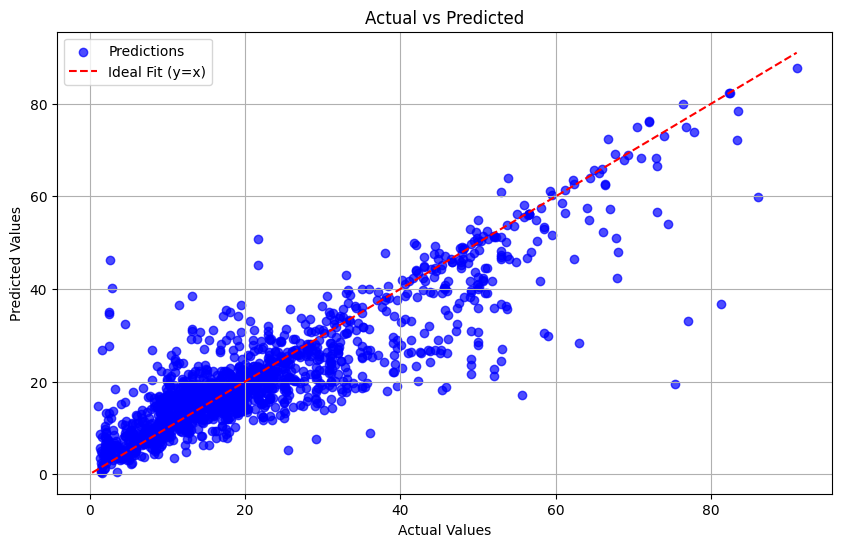

In [24]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Tur['Actual'], results_Tur['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Tur['Actual'].min(), results_Tur['Predicted'].min())
max_val = max(results_Tur['Actual'].max(), results_Tur['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [25]:
y_ph_pred = model_ph.predict(X_ph_test)
y_turbidity_pred

array([ 6.25064577, 14.83420686, 33.8532138 , ..., 21.17743229,
       14.56012786, 14.57866199])

In [26]:
results_Ph = pd.DataFrame({
    'Actual': y_ph_test.flatten() if hasattr(y_ph_test, 'flatten') else y_ph_test,
    'Predicted': y_ph_pred.flatten() if hasattr(y_ph_pred, 'flatten') else y_ph_pred
})

results_Ph

,Actual,Predicted
4607,7.780000,7.402373
4439,7.390000,7.379323
5733,6.987632,6.995245
8224,7.210000,7.188451
360,6.950000,7.009804
...,...,...
3098,7.010000,6.842185
6249,7.490000,7.483708
6620,7.437389,7.451110
2851,6.890000,6.939025


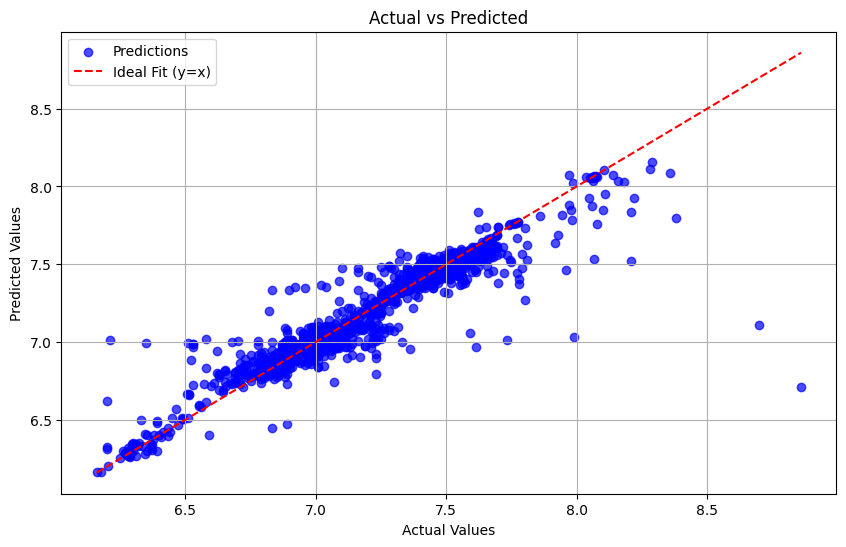

In [27]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Ph['Actual'], results_Ph['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Ph['Actual'].min(), results_Ph['Predicted'].min())
max_val = max(results_Ph['Actual'].max(), results_Ph['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()


In [28]:
y_colour_pred = model_colour.predict(X_colour_test)
y_colour_pred

array([ 46.76775285,  23.64808808, 130.05248835, ..., 209.64809582,
        27.75831548, 127.07230484])

In [29]:
results_Colo = pd.DataFrame({
    'Actual': y_colour_test.flatten() if hasattr(y_colour_test, 'flatten') else y_colour_test,
    'Predicted': y_colour_pred.flatten() if hasattr(y_colour_pred, 'flatten') else y_colour_pred
})


results_Colo

,Actual,Predicted
4607,43.000000,46.767753
4439,35.000000,23.648088
5733,135.379917,130.052488
8224,135.000000,123.041948
360,31.000000,21.721795
...,...,...
3098,13.000000,51.518901
6249,193.261124,163.873693
6620,243.031551,209.648096
2851,30.000000,27.758315


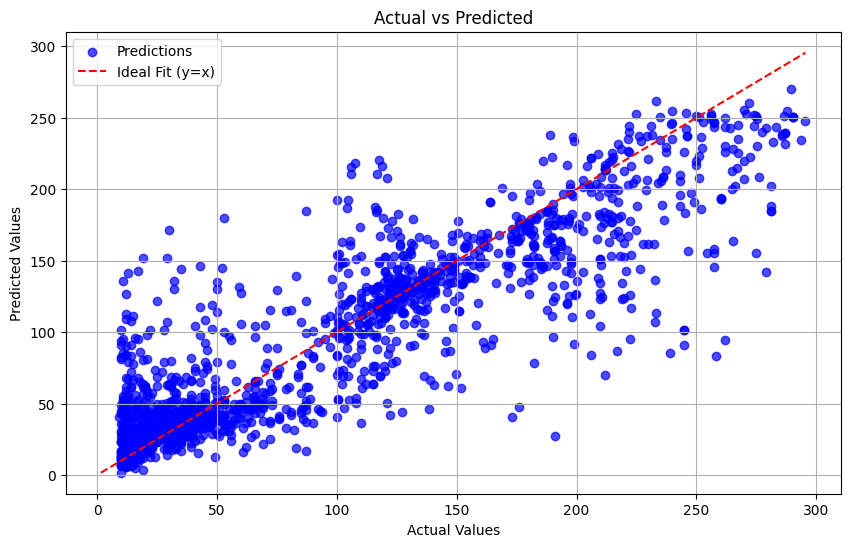

In [30]:
### plot the actuals and predicted values


import matplotlib.pyplot as plt

# Scatter plot with actual values on the x-axis and predicted values on the y-axis
plt.figure(figsize=(10, 6))

plt.scatter(results_Colo['Actual'], results_Colo['Predicted'], color='blue', alpha=0.7, label='Predictions')

# Adding a reference line (y = x) for comparison
min_val = min(results_Colo['Actual'].min(), results_Colo['Predicted'].min())
max_val = max(results_Colo['Actual'].max(), results_Colo['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')

# Labels, title, and legend
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()

# Display the plot
plt.show()




In [31]:
def evaluate_model(y_test, y_pred, target_name):
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2_score(y_test, y_pred):.2f}")

evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")


Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 4.42
Mean Squared Error (MSE): 50.41
R-squared (R²): 0.78

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.06
Mean Squared Error (MSE): 0.01
R-squared (R²): 0.88

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 22.49
Mean Squared Error (MSE): 1216.20
R-squared (R²): 0.80


# Validation

In [ ]:
def predict_from_input():
    print("Enter the following feature values:")
    raw_turbidity = float(input("Raw Turbidity: "))
    raw_ph = float(input("Raw PH: "))
    raw_colour = float(input("Raw Colour: "))
    pac = float(input("PAC: "))
    kmno4 = float(input("KMnO4: "))
    acd = float(input("ACD: "))

    # Combine inputs into a DataFrame
    input_data = pd.DataFrame({
        'Raw_Turbidity': [raw_turbidity],
        'Raw_PH': [raw_ph],
        'Raw_Colour': [raw_colour],
        'PAC': [pac],
        'KMnO4': [kmno4],
        'ACD': [acd]
    })

    # Make predictions
    turbidity_pred = model_turbidity.predict(input_data)
    ph_pred = model_ph.predict(input_data)
    colour_pred = model_colour.predict(input_data)

    # Display predictions
    print("\nPredicted Values:")
    print(f"Turbidity: {turbidity_pred[0]:.2f}")
    print(f"PH: {ph_pred[0]:.2f}")
    print(f"Colour: {colour_pred[0]:.2f}")

# Call the function to test
predict_from_input()


Enter the following feature values:


KeyboardInterrupt: Interrupted by user

# HyperParameter Tuning

## turbidity

In [ ]:
param_grid = {
    "iterations": [500, 300, 100],        # Number of boosting iterations
    "learning_rate": [0.05, 0.01, 0.02],  # Step size for weight updates
    "depth": [6, 8, 10],                  # Depth of trees
    "subsample": [0.6, 0.8, 1.0],         # Fraction of samples used per tree
    "l2_leaf_reg": [1, 3, 5]              # Regularization term (L2)
}

In [ ]:
!pip install scikit-learn

In [ ]:
model=CatBoostRegressor(random_state=42)

grid_search =  RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=10,  # Number of different combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available CPUs
    scoring='neg_mean_absolute_error'
)

In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_turbidity_train,y_turbidity_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)  # Convert to positive MSE

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 11.6047196	total: 16.8ms	remaining: 5.01s
1:	learn: 11.4334738	total: 29.1ms	remaining: 4.33s
2:	learn: 11.2465818	total: 40.2ms	remaining: 3.98s
3:	learn: 11.0736165	total: 51.5ms	remaining: 3.81s
4:	learn: 10.9127794	total: 62.8ms	remaining: 3.71s
5:	learn: 10.7647094	total: 74.9ms	remaining: 3.67s
6:	learn: 10.6223087	total: 86.2ms	remaining: 3.61s
7:	learn: 10.4848461	total: 97.6ms	remaining: 3.56s
8:	learn: 10.3736952	total: 109ms	remaining: 3.52s
9:	learn: 10.2446314	total: 120ms	remaining: 3.49s
10:	learn: 10.1363754	total: 131ms	remaining: 3.45s
11:	learn: 10.0307444	total: 142ms	remaining: 3.4s
12:	learn: 9.9282022	total: 154ms	remaining: 3.4s
13:	learn: 9.8316045	total: 166ms	remaining: 3.39s
14:	learn: 9.7414181	total: 186ms	remaining: 3.53s
15:	learn: 9.6618510	total: 201ms	remaining: 3.56s
16:	learn: 9.5924998	total: 218ms	remaining: 3.63s
17:	learn: 9.5078979	total: 235ms	remaining: 3.68s
18:	learn: 9.

## **ph**

In [ ]:
# Perform GridSearchCV to find the best hyperparameters
grid_search.fit(X_ph_train,y_ph_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.3124098	total: 14ms	remaining: 4.19s
1:	learn: 0.3024468	total: 16.8ms	remaining: 2.51s
2:	learn: 0.2923180	total: 28.8ms	remaining: 2.85s
3:	learn: 0.2830459	total: 40.6ms	remaining: 3s
4:	learn: 0.2746395	total: 53.3ms	remaining: 3.15s
5:	learn: 0.2664697	total: 66.2ms	remaining: 3.24s
6:	learn: 0.2588083	total: 78.8ms	remaining: 3.3s
7:	learn: 0.2517117	total: 91ms	remaining: 3.32s
8:	learn: 0.2456639	total: 92.6ms	remaining: 2.99s
9:	learn: 0.2393502	total: 104ms	remaining: 3.02s
10:	learn: 0.2330419	total: 118ms	remaining: 3.1s
11:	learn: 0.2276595	total: 129ms	remaining: 3.1s
12:	learn: 0.2228779	total: 132ms	remaining: 2.91s
13:	learn: 0.2179990	total: 144ms	remaining: 2.94s
14:	learn: 0.2133157	total: 155ms	remaining: 2.94s
15:	learn: 0.2085684	total: 166ms	remaining: 2.94s
16:	learn: 0.2047589	total: 180ms	remaining: 3s
17:	learn: 0.2009914	total: 197ms	remaining: 3.08s
18:	learn: 0.1974505	total: 211ms	r

## Colour

In [ ]:
grid_search.fit(X_colour_train, y_colour_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", -grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 41.7027344	total: 6.85ms	remaining: 2.05s
1:	learn: 41.2836041	total: 13.4ms	remaining: 2s
2:	learn: 40.9066871	total: 17.5ms	remaining: 1.73s
3:	learn: 40.5192044	total: 21.4ms	remaining: 1.58s
4:	learn: 40.0732943	total: 25.3ms	remaining: 1.49s
5:	learn: 39.6887272	total: 29.2ms	remaining: 1.43s
6:	learn: 39.2660103	total: 33.3ms	remaining: 1.39s
7:	learn: 38.9801826	total: 37.7ms	remaining: 1.38s
8:	learn: 38.6623220	total: 42ms	remaining: 1.36s
9:	learn: 38.3394957	total: 46.7ms	remaining: 1.35s
10:	learn: 38.1019980	total: 50.7ms	remaining: 1.33s
11:	learn: 37.7542876	total: 54.3ms	remaining: 1.3s
12:	learn: 37.5054706	total: 57.9ms	remaining: 1.28s
13:	learn: 37.2883657	total: 62.2ms	remaining: 1.27s
14:	learn: 37.0685400	total: 66.1ms	remaining: 1.25s
15:	learn: 36.8378045	total: 70.1ms	remaining: 1.24s
16:	learn: 36.5391038	total: 74ms	remaining: 1.23s
17:	learn: 36.3495810	total: 78.1ms	remaining: 1.22s
18: